findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


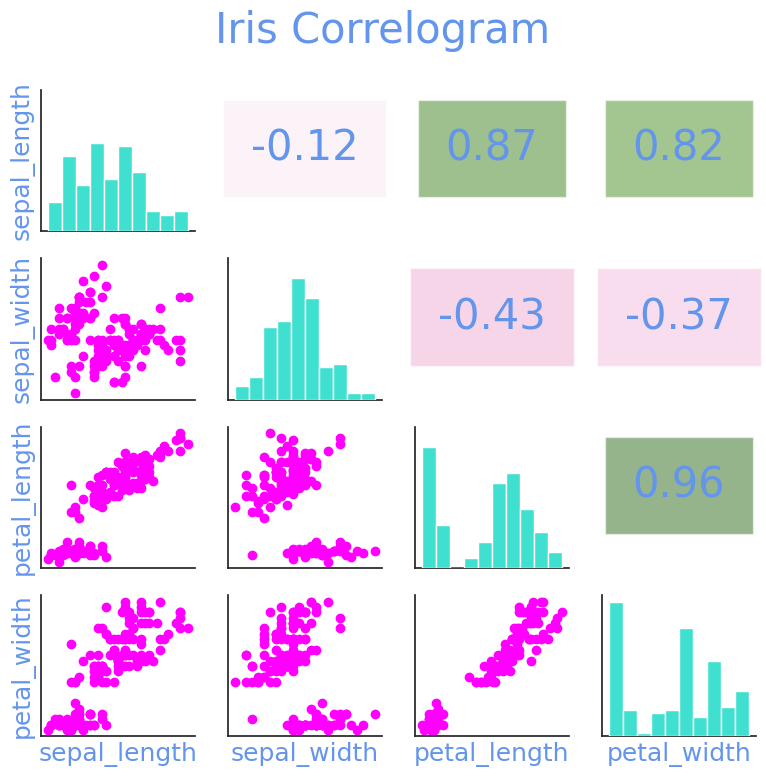

In [2]:
# The color can be set as extra parameter in g.map_diag(plt.hist, color=...) and g.map_lower(plt.scatter, color=...). The function reg_coef can be modified to take a colormap into account.

# The font color and family can be set via the rcParams. The ticks can be removed via plt.setp(g.axes, xticks=[], yticks=[]). Instead of subplot_adjust, g.fig.tight_layout() usually fits all elements nicely into the plot. Here is an example:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def reg_coef(x, y, label=None, color=None, cmap=None, **kwargs):
    ax = plt.gca()
    r, p = pearsonr(x, y)
    norm = plt.Normalize(-1, 1)
    cmap = cmap if not cmap is None else plt.cm.coolwarm
    ax.annotate(f'{r:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', fontsize=30,
                bbox={'facecolor': cmap(norm(r)), 'alpha': 0.5, 'pad': 20})
    ax.set_axis_off()

df = sns.load_dataset('iris')

sns.set(font_scale=1.5)
sns.set_style("white")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = 'cornflowerblue'
plt.rcParams['font.family'] = 'cursive'

g = sns.PairGrid(df, height=2)
g.map_diag(plt.hist, color='turquoise')
g.map_lower(plt.scatter, color='fuchsia')
g.map_upper(reg_coef, cmap=plt.get_cmap('PiYG'))
plt.setp(g.axes, xticks=[], yticks=[])

g.fig.suptitle('Iris Correlogram', fontsize=30)
g.fig.tight_layout()
plt.show()